In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TRAIN:TEST = 7:3

{'smoothing_level': 0.4496502488878999, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 124.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 57.66502909098617
MAE: 44.01849740190956
MAPE: 0.49733265953006256


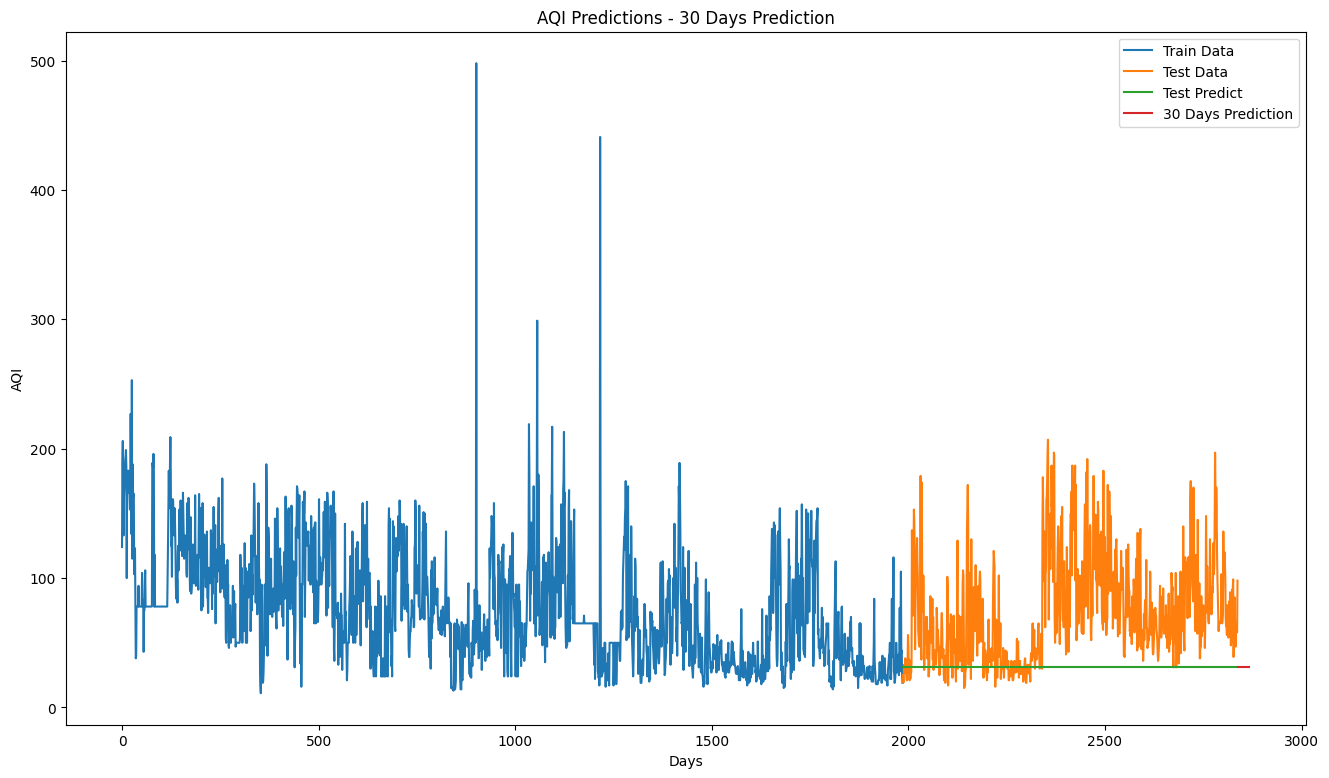

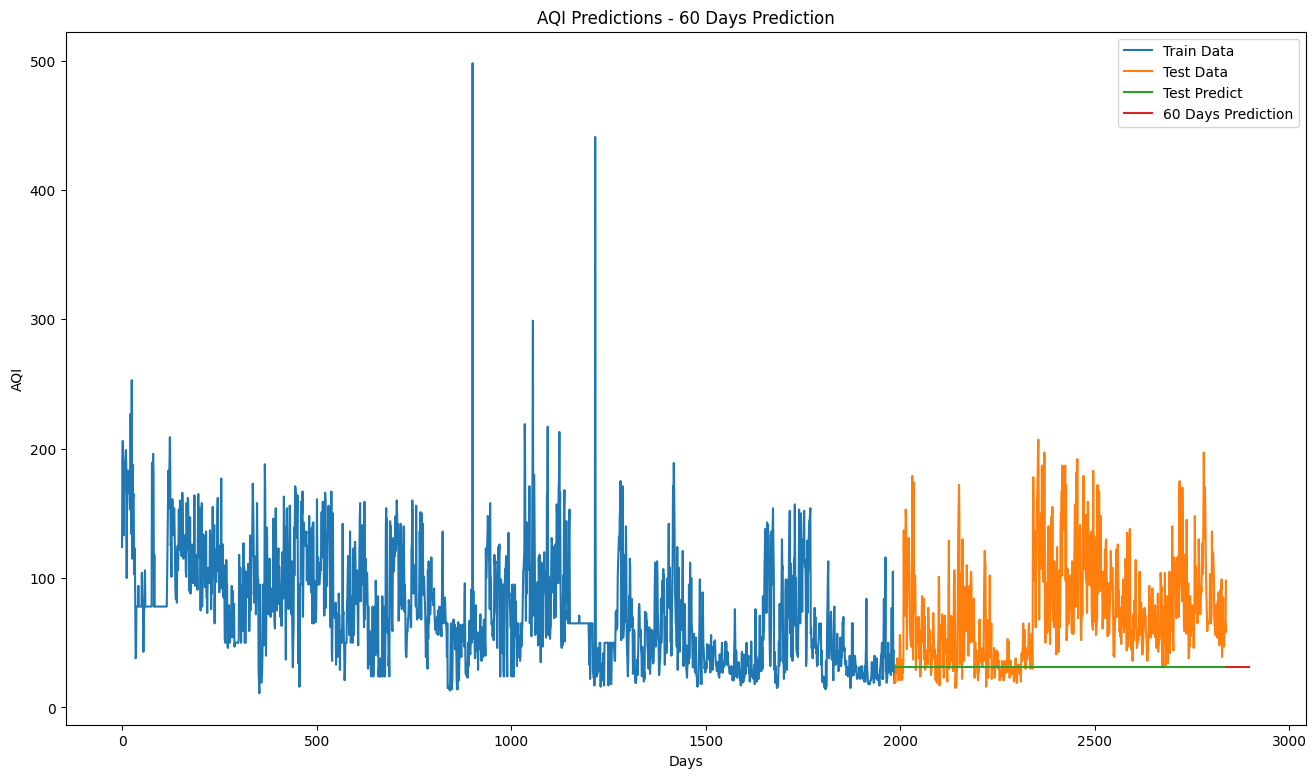

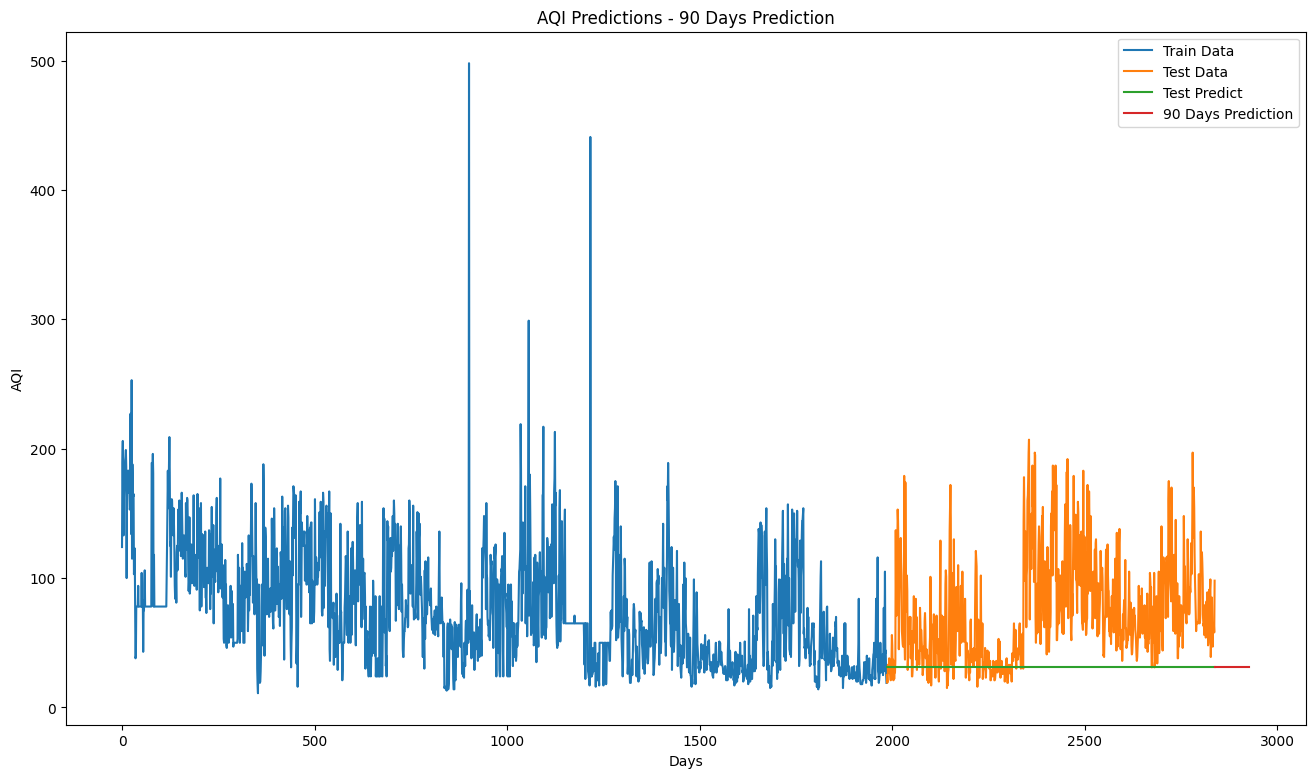

In [4]:
# 1. Import thư viện cần thiết
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 2. Đọc file csv và gắn index với giá AQI
df = pd.read_csv('/content/drive/MyDrive/LSTM/Data/HaNoi.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df[df['date'] <= '2024-06-01']
df1=df.reset_index()['AQI']

# 3. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))
train_data = df1[:train_size]
test_data = df1[train_size:]

# 4. Define SES Model
model = SimpleExpSmoothing(np.asarray(train_data))
model.fit(optimized=True)
print(model.params)

# 5. Dự báo dữ liệu test
start = len(train_data)
end = len(df1) - 1
test_predict = model.predict(model.params,start=start, end=end)

# 6. Đánh giá độ chính xác thuật toán bằng RMSE,MAE,MAPE
rmse = np.sqrt(mean_squared_error(test_data , test_predict))
mae = mean_absolute_error(test_data , test_predict)
mape = mean_absolute_percentage_error(test_data , test_predict)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

# 8. Tạo hàm dự đoán
def predict_future(model, data, future_days):
  start = len(df1)
  end = len(df1) + future_days -1
  future_output = model.predict(model.params,start=start, end=end)
  return future_output

# 9. Dự đoán 30, 60, 90 ngày
future_30_days = predict_future(model, df1, 30)
future_60_days = predict_future(model, df1, 60)
future_90_days = predict_future(model, df1, 90)

# 10. Hàm trực quan dữ liệu
def create_plot(future_days, future_data, future_label):
    plt.figure(figsize=(16, 9))

    # Plot train data
    plt.plot(train_data, label='Train Data')

    # Plot test data
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')

    # Plot test predictions
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_predict, label='Test Predict')

    # Plot future predictions
    plt.plot(np.arange(len(df1), len(df1) + future_days), future_data, label=future_label)

    # Add labels and legend
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.title(f'AQI Predictions - {future_label}')
    plt.legend()
    plt.show()

# 11. Create plots
create_plot(30, future_30_days, '30 Days Prediction')
create_plot(60, future_60_days, '60 Days Prediction')
create_plot(90, future_90_days, '90 Days Prediction')

TRAIN:TEST = 8:2

{'smoothing_level': 0.45097058654634514, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 124.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 68.84394318268028
MAE: 57.162010056443684
MAPE: 0.6106376901324866


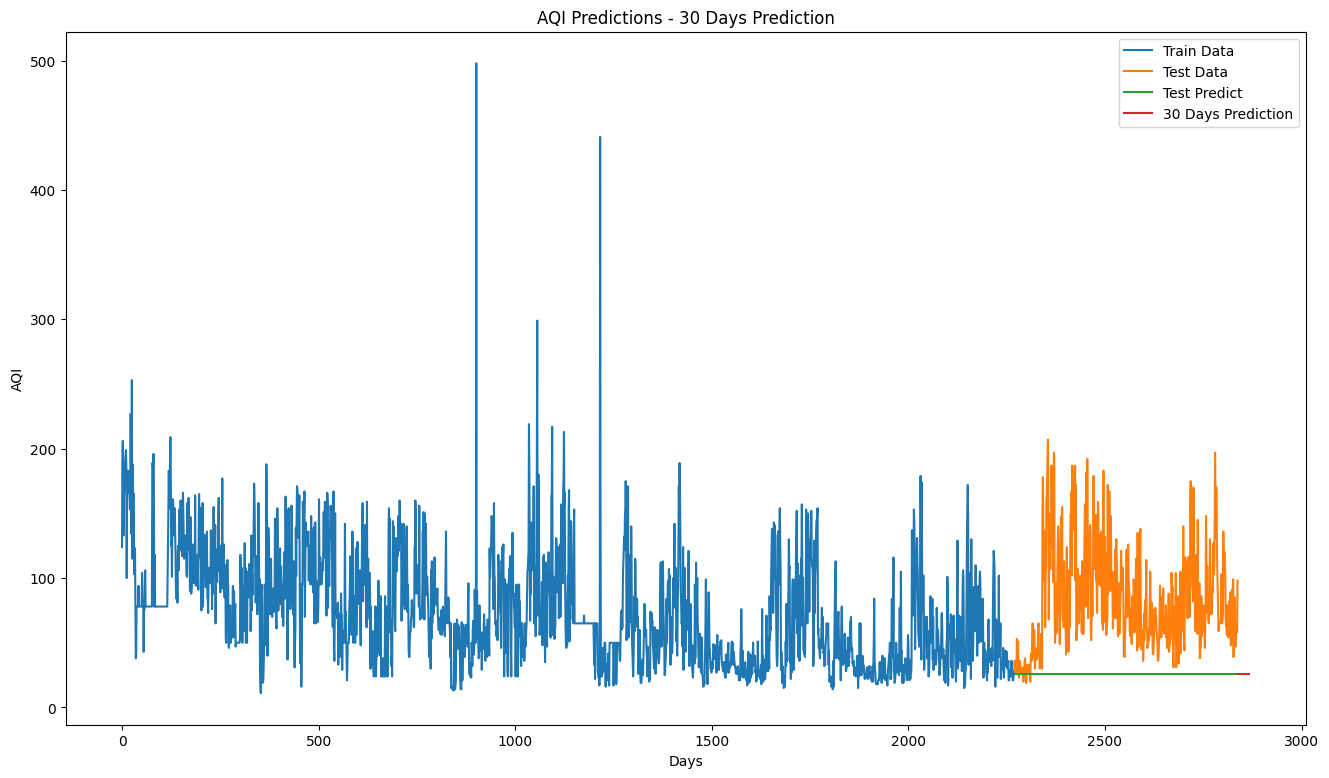

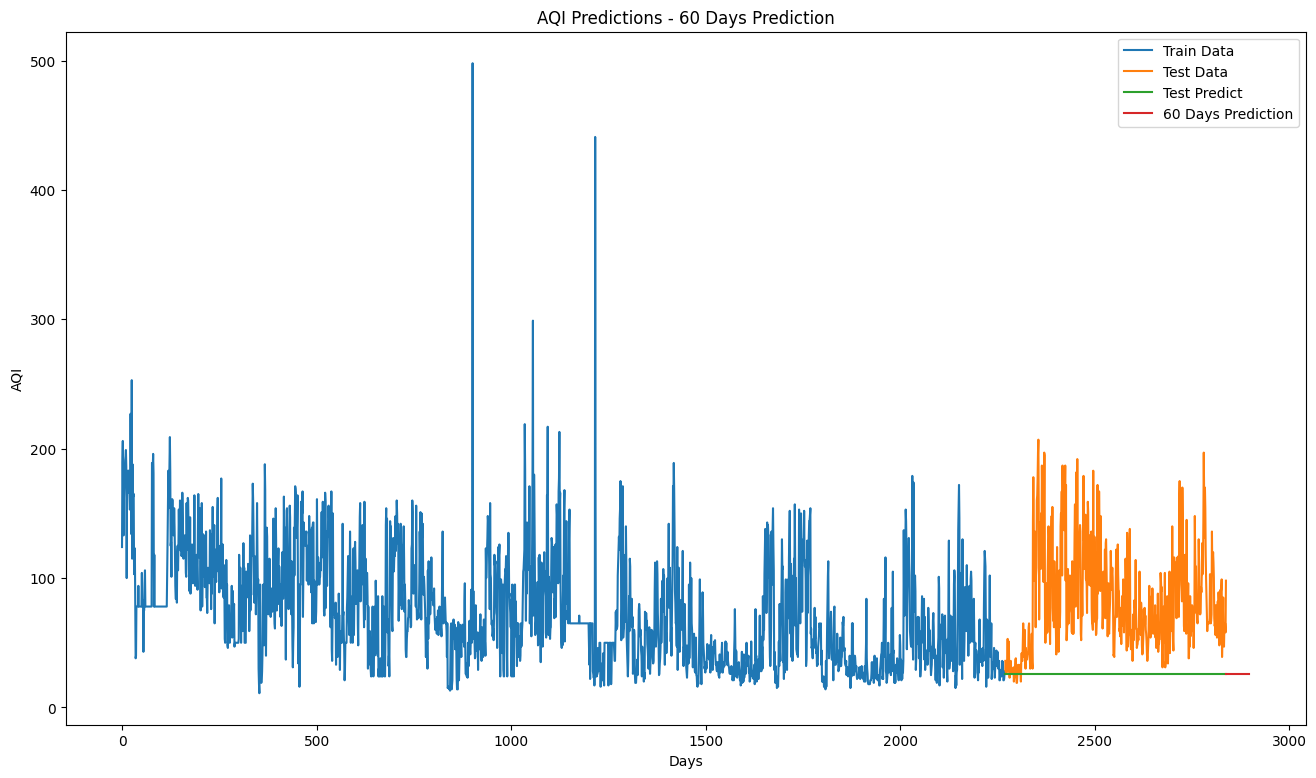

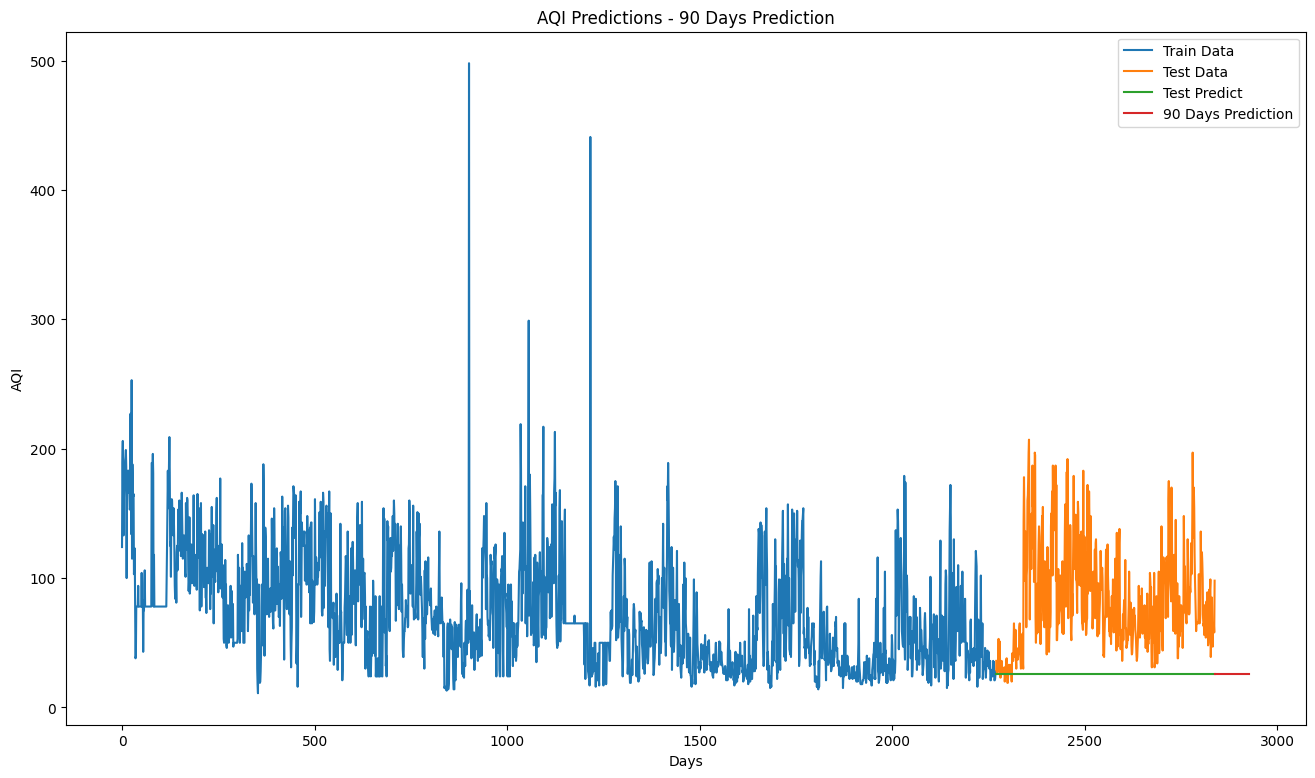

In [5]:
# 1. Import thư viện cần thiết
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 2. Đọc file csv và gắn index với giá AQI
df = pd.read_csv('/content/drive/MyDrive/LSTM/Data/HaNoi.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df[df['date'] <= '2024-06-01']
df1=df.reset_index()['AQI']

# 3. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))
train_data = df1[:train_size]
test_data = df1[train_size:]

# 4. Define SES Model
model = SimpleExpSmoothing(np.asarray(train_data))
model.fit(optimized=True)
print(model.params)

# 5. Dự báo dữ liệu test
start = len(train_data)
end = len(df1) - 1
test_predict = model.predict(model.params,start=start, end=end)

# 6. Đánh giá độ chính xác thuật toán bằng RMSE,MAE,MAPE
rmse = np.sqrt(mean_squared_error(test_data , test_predict))
mae = mean_absolute_error(test_data , test_predict)
mape = mean_absolute_percentage_error(test_data , test_predict)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

# 8. Tạo hàm dự đoán
def predict_future(model, data, future_days):
  start = len(df1)
  end = len(df1) + future_days -1
  future_output = model.predict(model.params,start=start, end=end)
  return future_output

# 9. Dự đoán 30, 60, 90 ngày
future_30_days = predict_future(model, df1, 30)
future_60_days = predict_future(model, df1, 60)
future_90_days = predict_future(model, df1, 90)

# 10. Hàm trực quan dữ liệu
def create_plot(future_days, future_data, future_label):
    plt.figure(figsize=(16, 9))

    # Plot train data
    plt.plot(train_data, label='Train Data')

    # Plot test data
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')

    # Plot test predictions
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_predict, label='Test Predict')

    # Plot future predictions
    plt.plot(np.arange(len(df1), len(df1) + future_days), future_data, label=future_label)

    # Add labels and legend
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.title(f'AQI Predictions - {future_label}')
    plt.legend()
    plt.show()

# 11. Create plots
create_plot(30, future_30_days, '30 Days Prediction')
create_plot(60, future_60_days, '60 Days Prediction')
create_plot(90, future_90_days, '90 Days Prediction')

TRAIN:TEST = 9:1

{'smoothing_level': 0.4530818440479959, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 124.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 32.019185899104244
MAE: 22.76809012112102
MAPE: 0.2683322513179457


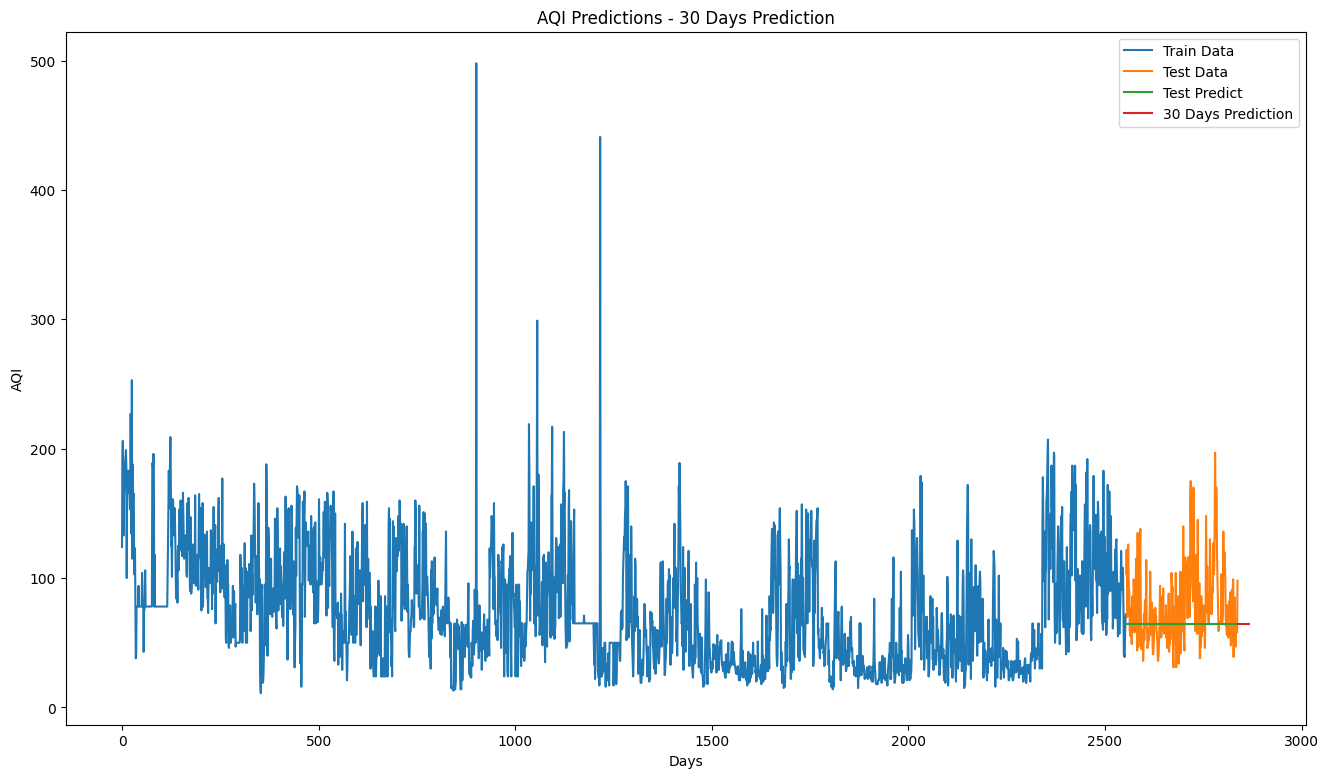

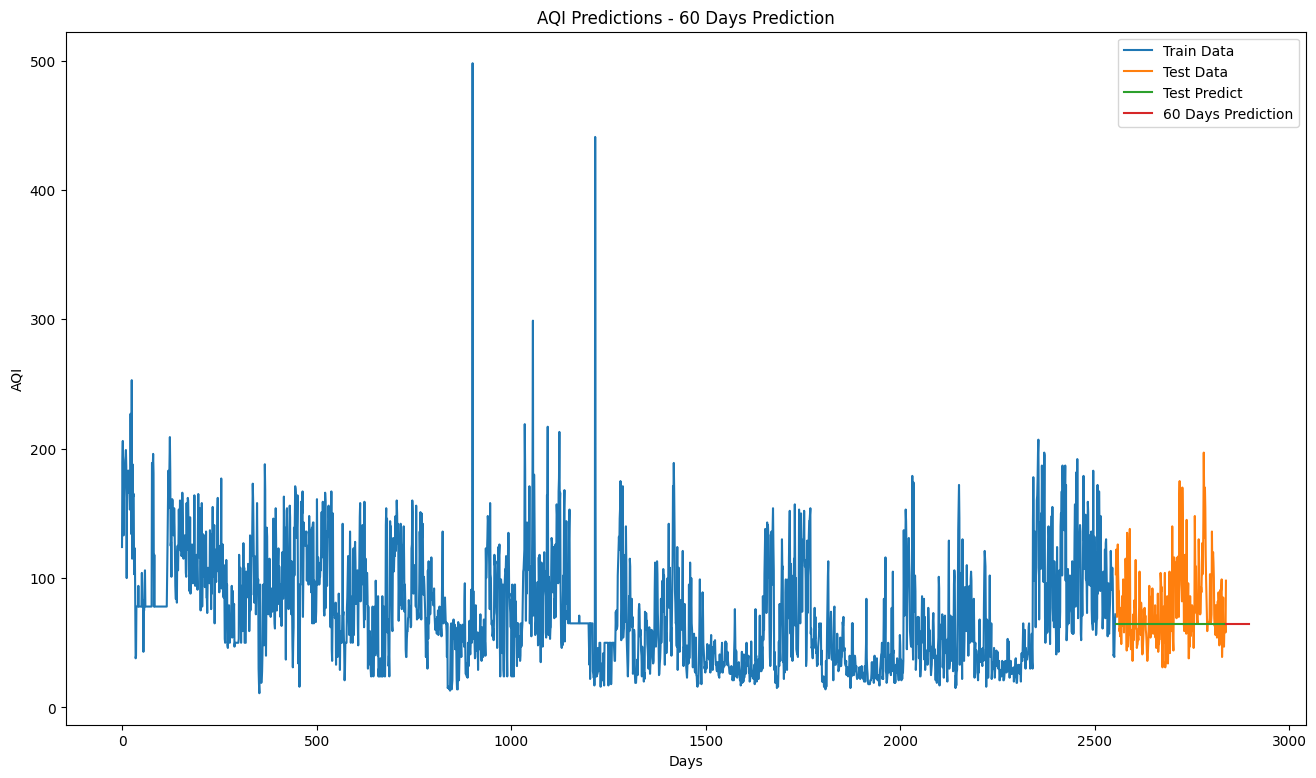

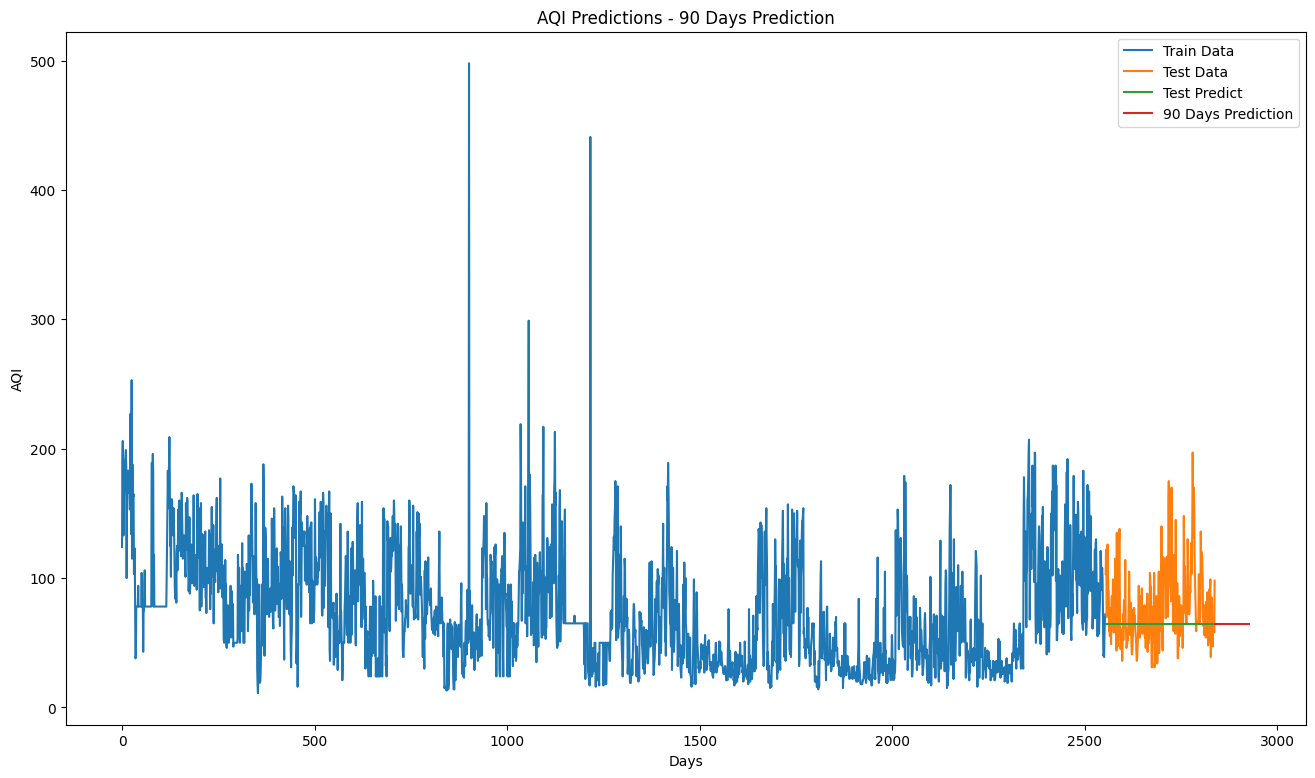

In [6]:
# 1. Import thư viện cần thiết
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 2. Đọc file csv và gắn index với giá AQI
df = pd.read_csv('/content/drive/MyDrive/LSTM/Data/HaNoi.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df[df['date'] <= '2024-06-01']
df1=df.reset_index()['AQI']

# 3. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))
train_data = df1[:train_size]
test_data = df1[train_size:]

# 4. Define SES Model
model = SimpleExpSmoothing(np.asarray(train_data))
model.fit(optimized=True)
print(model.params)

# 5. Dự báo dữ liệu test
start = len(train_data)
end = len(df1) - 1
test_predict = model.predict(model.params,start=start, end=end)

# 6. Đánh giá độ chính xác thuật toán bằng RMSE,MAE,MAPE
rmse = np.sqrt(mean_squared_error(test_data , test_predict))
mae = mean_absolute_error(test_data , test_predict)
mape = mean_absolute_percentage_error(test_data , test_predict)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

# 8. Tạo hàm dự đoán
def predict_future(model, data, future_days):
  start = len(df1)
  end = len(df1) + future_days -1
  future_output = model.predict(model.params,start=start, end=end)
  return future_output

# 9. Dự đoán 30, 60, 90 ngày
future_30_days = predict_future(model, df1, 30)
future_60_days = predict_future(model, df1, 60)
future_90_days = predict_future(model, df1, 90)

# 10. Hàm trực quan dữ liệu
def create_plot(future_days, future_data, future_label):
    plt.figure(figsize=(16, 9))

    # Plot train data
    plt.plot(train_data, label='Train Data')

    # Plot test data
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')

    # Plot test predictions
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_predict, label='Test Predict')

    # Plot future predictions
    plt.plot(np.arange(len(df1), len(df1) + future_days), future_data, label=future_label)

    # Add labels and legend
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.title(f'AQI Predictions - {future_label}')
    plt.legend()
    plt.show()

# 11. Create plots
create_plot(30, future_30_days, '30 Days Prediction')
create_plot(60, future_60_days, '60 Days Prediction')
create_plot(90, future_90_days, '90 Days Prediction')